Sources : https://analyticsindiamag.com/guide-to-multi-class-classification/

https://colab.research.google.com/drive/19dQTVjbjhKQoqVj0v4x34fNTpc0co5cf?usp=sharing#scrollTo=pZug4ZF56w5e

https://stackoverflow.com/questions/33547965/computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b

### Importing the data

2. [Extracting Median and EDA](#Extracting_Median_and_EDA)

3. [Extracting_Minimum](#Extracting_Minimum)

4. [Extracting_Maximum](#Extracting_Maximum)

5. [Extracting_Variance](#Extracting_Variance)

6. [Extracting_std](#Extracting_std)

7. [Extracting_ptp](#Extracting_ptp)

8. [Extracting_iqr](#Extracting_iqr)

10. [Classification_models_for_Cooler_failure](#Classification_models_for_Cooler_failure)

    10a. [Building_a_LR_for_Cooler_Condition](#Building_a_LR_for_Cooler_Condition)
    

Inducing noise : https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.


df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se


df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 

df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:

df_fs2.columns = col(601,'fs2')

In [11]:
df_vs1.columns = col(61,'vs1')

In [12]:
df_ce.columns = col(61,'ce')

In [13]:
df_cp.columns = col(61,'cp')

In [14]:
df_ps = pd.concat([df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_vs1], axis = 1)


In [15]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps4_1,ps4_2,ps4_3,ps4_4,ps4_5,ps4_6,ps4_7,ps4_8,ps4_9,ps4_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


#### Checking for clustering tendency in each Sensor
#### Ideas for feature extraction and dimensionality reduction

1. **Rolling window of size 60 and follow it with statistical measures**  
2. **Use Python frameworks like tfresh and TSFEL**
3. Make clusters using k-means and SVM 
4. **Rolling window of size 60 and follow it with PCA. Use this article for reference : https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/**


In [16]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [17]:
Final = pd.concat([df, profile], axis = 1)
Final['Cycle'] = np.arange(len(Final))
Final.head()

,ps4_1,ps4_2,ps4_3,ps4_4,ps4_5,ps4_6,ps4_7,ps4_8,ps4_9,ps4_10,...,vs1_57,vs1_58,vs1_59,vs1_60,Cooler Condition,Valve Condition,Internal Pump Leakage,Hydraulic Accumulator,Stable Flag,Cycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.544,0.545,0.535,0.543,3,100,0,130,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.540,0.533,0.531,0.534,3,100,0,130,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.545,0.544,0.530,0.534,3,100,0,130,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.544,0.543,0.543,0.542,3,100,0,130,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.549,0.542,0.533,0.537,3,100,0,130,1,4


# Statistical features

<a id = 'Extracting_Median_and_EDA'></a>

## Extracting Median

In [18]:
def median_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.median(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [19]:

PS4_median = pd.DataFrame(median_conversion(df_ps4))
PS4_median.columns = ['PS4_median']

PS5_median = pd.DataFrame(median_conversion(df_ps5))
PS5_median.columns = ['PS5_median']

PS6_median = pd.DataFrame(median_conversion(df_ps6))
PS6_median.columns = ['PS6_median']

TS1_median = pd.DataFrame(median_conversion(df_ts1))
TS1_median.columns = ['TS1_median']

TS2_median = pd.DataFrame(median_conversion(df_ts2))
TS2_median.columns = ['TS2_median']

TS3_median = pd.DataFrame(median_conversion(df_ts3))
TS3_median.columns = ['TS3_median']

TS4_median = pd.DataFrame(median_conversion(df_ts4))
TS4_median.columns = ['TS4_median']


FS2_median = pd.DataFrame(median_conversion(df_fs2))
FS2_median.columns = ['FS2_median']


VS1_median = pd.DataFrame(median_conversion(df_vs1))
VS1_median.columns = ['VS1_median']

CE1_median = pd.DataFrame(median_conversion(df_ce))
CE1_median.columns = ['CE1_median']

CP1_median = pd.DataFrame(median_conversion(df_cp))
CP1_median.columns = ['CP1_median']


In [20]:
Median = pd.concat([PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,FS2_median,
                    VS1_median,CE1_median,CP1_median],axis = 1)

<a id = 'Extracting_Variance'></a>

## Extracting Variance

In [21]:
def var_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.var(axis=1) ## AVERAGE ALONG |THE ROW
    return df1

In [22]:
PS4_var = pd.DataFrame(var_conversion(df_ps4))
PS4_var.columns = ['PS4_var']

PS5_var = pd.DataFrame(var_conversion(df_ps5))
PS5_var.columns = ['PS5_var']

PS6_var = pd.DataFrame(var_conversion(df_ps6))
PS6_var.columns = ['PS6_var']

TS1_var = pd.DataFrame(var_conversion(df_ts1))
TS1_var.columns = ['TS1_var']

TS2_var = pd.DataFrame(var_conversion(df_ts2))
TS2_var.columns = ['TS2_var']

TS3_var = pd.DataFrame(var_conversion(df_ts3))
TS3_var.columns = ['TS3_var']

TS4_var = pd.DataFrame(var_conversion(df_ts4))
TS4_var.columns = ['TS4_var']


FS2_var = pd.DataFrame(var_conversion(df_fs2))
FS2_var.columns = ['FS2_var']

VS1_var = pd.DataFrame(var_conversion(df_vs1))
VS1_var.columns = ['VS1_var']

CE1_var = pd.DataFrame(var_conversion(df_ce))
CE1_var.columns = ['CE1_var']

CP1_var = pd.DataFrame(var_conversion(df_cp))
CP1_var.columns = ['CP1_var']

Var = pd.concat([PS4_var,PS5_var,PS6_var,TS1_var,TS2_var,TS3_var,TS4_var,
                 FS2_var,VS1_var,CE1_var,CP1_var],axis = 1)


<a id = 'Extracting_std'></a>

## Extracting Standard Deviation

In [23]:
def std_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.std(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [24]:
PS4_std = pd.DataFrame(std_conversion(df_ps4))
PS4_std.columns = ['PS4_std']

PS5_std = pd.DataFrame(std_conversion(df_ps5))
PS5_std.columns = ['PS5_std']

PS6_std = pd.DataFrame(std_conversion(df_ps6))
PS6_std.columns = ['PS6_std']

TS1_std = pd.DataFrame(std_conversion(df_ts1))
TS1_std.columns = ['TS1_std']

TS2_std = pd.DataFrame(std_conversion(df_ts2))
TS2_std.columns = ['TS2_std']

TS3_std = pd.DataFrame(std_conversion(df_ts3))
TS3_std.columns = ['TS3_std']

TS4_std = pd.DataFrame(std_conversion(df_ts4))
TS4_std.columns = ['TS4_std']

FS2_std = pd.DataFrame(std_conversion(df_fs2))
FS2_std.columns = ['FS2_std']

VS1_std = pd.DataFrame(std_conversion(df_vs1))
VS1_std.columns = ['VS1_std']

CE1_std = pd.DataFrame(std_conversion(df_ce))
CE1_std.columns = ['CE1_std']

CP1_std = pd.DataFrame(std_conversion(df_cp))
CP1_std.columns = ['CP1_std']

Std = pd.concat([PS4_std,PS5_std,PS6_std,TS1_std,TS2_std,TS3_std,TS4_std,
                 FS2_std,VS1_std,CE1_std,CP1_std],axis = 1)


<a id = 'Extracting_ptp'></a>

## Extracting MAX

In [25]:
def max_con(df):
    df1 = pd.DataFrame()
    df1 = df.max(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [26]:
PS4_ptp = pd.DataFrame(max_con(df_ps4))
PS4_ptp.columns = ['PS4_ptp']

PS5_ptp = pd.DataFrame(max_con(df_ps5))
PS5_ptp.columns = ['PS5_ptp']

PS6_ptp = pd.DataFrame(max_con(df_ps6))
PS6_ptp.columns = ['PS6_ptp']

TS1_ptp = pd.DataFrame(max_con(df_ts1))
TS1_ptp.columns = ['TS1_ptp']

TS2_ptp = pd.DataFrame(max_con(df_ts2))
TS2_ptp.columns = ['TS2_ptp']

TS3_ptp = pd.DataFrame(max_con(df_ts3))
TS3_ptp.columns = ['TS3_ptp']

TS4_ptp = pd.DataFrame(max_con(df_ts4))
TS4_ptp.columns = ['TS4_ptp']

FS2_ptp = pd.DataFrame(max_con(df_fs2))
FS2_ptp.columns = ['FS2_ptp']

VS1_ptp = pd.DataFrame(max_con(df_vs1))
VS1_ptp.columns = ['VS1_ptp']

CE1_ptp = pd.DataFrame(max_con(df_ce))
CE1_ptp.columns = ['CE1_ptp']

CP1_ptp = pd.DataFrame(max_con(df_cp))
CP1_ptp.columns = ['CP1_ptp']


Max = pd.concat([PS4_ptp,PS5_ptp,PS6_ptp,TS1_ptp,TS2_ptp,TS3_ptp,TS4_ptp,
                 FS2_ptp,VS1_ptp,CE1_ptp,CP1_ptp],axis = 1)

In [27]:
statsfinal = pd.concat([Median, Std, Var, Max], axis = 1)

In [28]:
statsfinal.head()

,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,FS2_median,VS1_median,CE1_median,...,PS5_ptp,PS6_ptp,TS1_ptp,TS2_ptp,TS3_ptp,TS4_ptp,FS2_ptp,VS1_ptp,CE1_ptp,CP1_ptp
0,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,10.327,0.5770,40.6755,...,10.016,9.887,36.152,41.250,38.613,33.594,10.446,0.624,47.438,2.188
1,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,10.403,0.5595,25.3855,...,9.745,9.637,37.488,42.105,39.254,35.148,10.453,0.626,29.208,1.414
2,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,10.367,0.5620,22.1040,...,9.640,9.536,38.621,43.039,40.062,36.141,10.443,0.662,23.554,1.159
3,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,10.302,0.5550,20.4805,...,9.535,9.431,39.473,43.988,40.934,36.988,10.382,0.645,21.565,1.107
4,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,10.236,0.5760,19.7985,...,9.443,9.342,40.391,44.887,41.777,37.781,10.312,0.660,20.460,1.106


## Extracting MIN

In [29]:
def min_con(df):
    df1 = pd.DataFrame()
    df1 = df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [30]:
PS4_min = pd.DataFrame(min_con(df_ps4))
PS4_min.columns = ['PS4_min']

PS5_min = pd.DataFrame(min_con(df_ps5))
PS5_min.columns = ['PS5_min']

PS6_min = pd.DataFrame(min_con(df_ps6))
PS6_min.columns = ['PS6_min']

TS1_min = pd.DataFrame(min_con(df_ts1))
TS1_min.columns = ['TS1_min']

TS2_min = pd.DataFrame(min_con(df_ts2))
TS2_min.columns = ['TS2_min']

TS3_min = pd.DataFrame(min_con(df_ts3))
TS3_min.columns = ['TS3_min']

TS4_min = pd.DataFrame(min_con(df_ts4))
TS4_min.columns = ['TS4_min']

FS2_min = pd.DataFrame(min_con(df_fs2))
FS2_min.columns = ['FS2_min']

VS1_min = pd.DataFrame(min_con(df_vs1))
VS1_min.columns = ['VS1_min']

CE1_min = pd.DataFrame(min_con(df_ce))
CE1_min.columns = ['CE1_min']

CP1_min = pd.DataFrame(min_con(df_cp))
CP1_min.columns = ['CP1_min']


Min = pd.concat([PS4_min,PS5_min,PS6_min,TS1_min,TS2_min,TS3_min,TS4_min,
                 FS2_min,VS1_min,CE1_min,CP1_min],axis = 1)

<a id = 'Extracting_iqr'></a>

## Extracting Interquartile Range

In [31]:
def iqr_conversion(df):
    df1 = pd.DataFrame()
    q3, q1 = np.percentile(df, [75 ,25])
    iqr = q3 - q1
    df1 = df.max(axis=1)-df.min(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [32]:

PS4_iqr = pd.DataFrame(iqr_conversion(df_ps4))
PS4_iqr.columns = ['PS4_iqr']

PS5_iqr = pd.DataFrame(iqr_conversion(df_ps5))
PS5_iqr.columns = ['PS5_iqr']

PS6_iqr = pd.DataFrame(iqr_conversion(df_ps6))
PS6_iqr.columns = ['PS6_iqr']

TS1_iqr = pd.DataFrame(iqr_conversion(df_ts1))
TS1_iqr.columns = ['TS1_iqr']

TS2_iqr = pd.DataFrame(iqr_conversion(df_ts2))
TS2_iqr.columns = ['TS2_iqr']

TS3_iqr = pd.DataFrame(iqr_conversion(df_ts3))
TS3_iqr.columns = ['TS3_iqr']

TS4_iqr = pd.DataFrame(iqr_conversion(df_ts4))
TS4_iqr.columns = ['TS4_iqr']


FS2_iqr = pd.DataFrame(iqr_conversion(df_fs2))
FS2_iqr.columns = ['FS2_iqr']


VS1_iqr = pd.DataFrame(iqr_conversion(df_vs1))
VS1_iqr.columns = ['VS1_iqr']

CE1_iqr = pd.DataFrame(iqr_conversion(df_ce))
CE1_iqr.columns = ['CE1_iqr']

CP1_iqr = pd.DataFrame(iqr_conversion(df_cp))
CP1_iqr.columns = ['CP1_iqr']


Iqr = pd.concat([PS4_iqr,PS5_iqr,PS6_iqr,TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,
                 FS2_iqr,VS1_iqr,CE1_iqr,CP1_iqr],axis = 1)


In [33]:
statsfinal = pd.concat([statsfinal, Max, Min, Iqr],axis = 1)

In [34]:
statsfinal.head()

,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,FS2_median,VS1_median,CE1_median,...,PS5_iqr,PS6_iqr,TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,FS2_iqr,VS1_iqr,CE1_iqr,CP1_iqr
0,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,10.327,0.5770,40.6755,...,0.335,0.319,0.996,0.477,0.297,3.231,0.298,0.092,18.572,0.805
1,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,10.403,0.5595,25.3855,...,0.188,0.183,1.840,1.074,0.586,1.500,0.101,0.102,5.888,0.267
2,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,10.367,0.5620,22.1040,...,0.185,0.188,1.742,1.207,0.828,1.043,0.147,0.133,2.334,0.083
3,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,10.302,0.5550,20.4805,...,0.172,0.174,1.586,1.183,0.911,0.883,0.141,0.118,1.892,0.085
4,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,10.236,0.5760,19.7985,...,0.153,0.147,1.602,1.145,0.918,0.789,0.133,0.136,1.327,0.090


In [35]:
statsfinal_target = pd.concat([statsfinal,profile], axis = 1)

In [36]:
statsfinal.head()

,PS4_median,PS5_median,PS6_median,TS1_median,TS2_median,TS3_median,TS4_median,FS2_median,VS1_median,CE1_median,...,PS5_iqr,PS6_iqr,TS1_iqr,TS2_iqr,TS3_iqr,TS4_iqr,FS2_iqr,VS1_iqr,CE1_iqr,CP1_iqr
0,0.0,9.844,9.733,35.5720,40.9630,38.4960,31.576,10.327,0.5770,40.6755,...,0.335,0.319,0.996,0.477,0.297,3.231,0.298,0.092,18.572,0.805
1,0.0,9.632,9.526,36.7675,41.5180,38.9845,34.553,10.403,0.5595,25.3855,...,0.188,0.183,1.840,1.074,0.586,1.500,0.101,0.102,5.888,0.267
2,0.0,9.528,9.425,38.0235,42.4235,39.6270,35.635,10.367,0.5620,22.1040,...,0.185,0.188,1.742,1.207,0.828,1.043,0.147,0.133,2.334,0.083
3,0.0,9.436,9.335,39.0550,43.3650,40.3420,36.635,10.302,0.5550,20.4805,...,0.172,0.174,1.586,1.183,0.911,0.883,0.141,0.118,1.892,0.085
4,0.0,9.358,9.260,39.9670,44.3355,41.3400,37.439,10.236,0.5760,19.7985,...,0.153,0.147,1.602,1.145,0.918,0.789,0.133,0.136,1.327,0.090


In [37]:
profile_cooler = profile['Cooler Condition']

<a id = 'Classification_models_for_Cooler_failure'></a>

# Classification of Cooler condition

### Train -Test split

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(statsfinal, profile_cooler, train_size=0.7, test_size=0.3, random_state=100, stratify = profile_cooler )

### Standardisation of Data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [41]:
X_train_scaled.columns = statsfinal.columns 
X_test_scaled.columns = statsfinal.columns 

In [42]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 77)
(1543, 77)


In [43]:
SFy_traindf = pd.DataFrame(y_train)
SFy_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())


100    519
20     512
3      512
Name: Cooler Condition, dtype: int64
100    222
20     220
3      220
Name: Cooler Condition, dtype: int64


Dataset is fairly balanced

In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\Admin\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [45]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

<a id = 'SVM_for_cooler_failure_classification.'></a>

### SVM for cooler failure classification

## PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

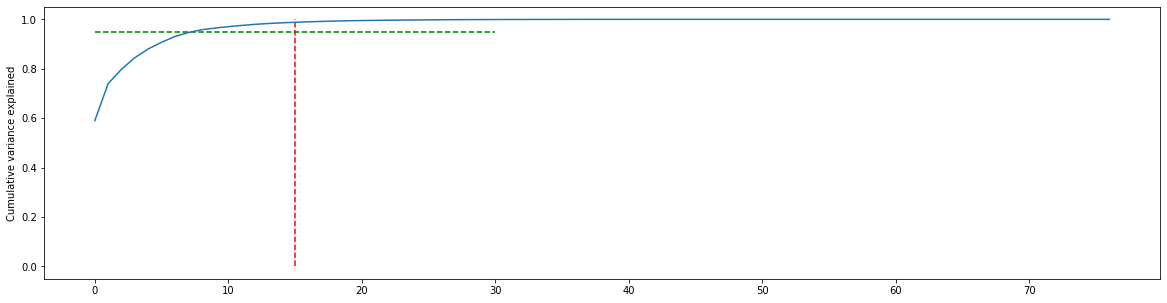

In [48]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()




In [49]:

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)


In [50]:
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(X_train_pca.shape)
print(X_test_pca.shape)

(1543, 17)
(662, 17)


In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [53]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

In [54]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_pca,y_test, display_labels= ['Close to Failure','Reduced efficiency','Full Efficiency'],  ax = ax)
    return disp.confusion_matrix
    

array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

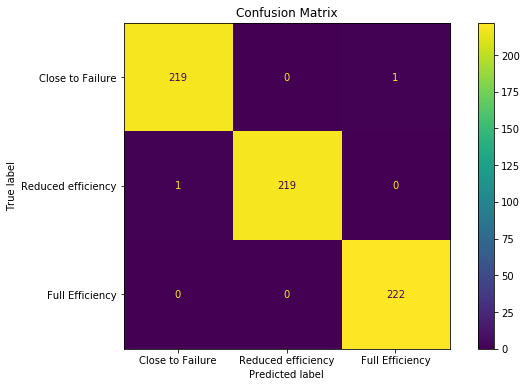

In [55]:
cmatrix(svm_model_linear)

In [56]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



In [57]:
y_score_svm = svm_model_linear.fit(X_train_scaled, y_train).decision_function(X_test)
y_score_svm

array([[ 2.31221495,  0.70722882, -0.29442067],
       [ 2.32304113,  0.69360276, -0.31746939],
       [ 2.32686711,  0.68494608, -0.32361927],
       ...,
       [ 2.32649763,  0.68586083, -0.32304437],
       [ 2.32693085,  0.6848421 , -0.32373364],
       [ 2.32296308,  0.69375118, -0.31733544]])

In [58]:
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

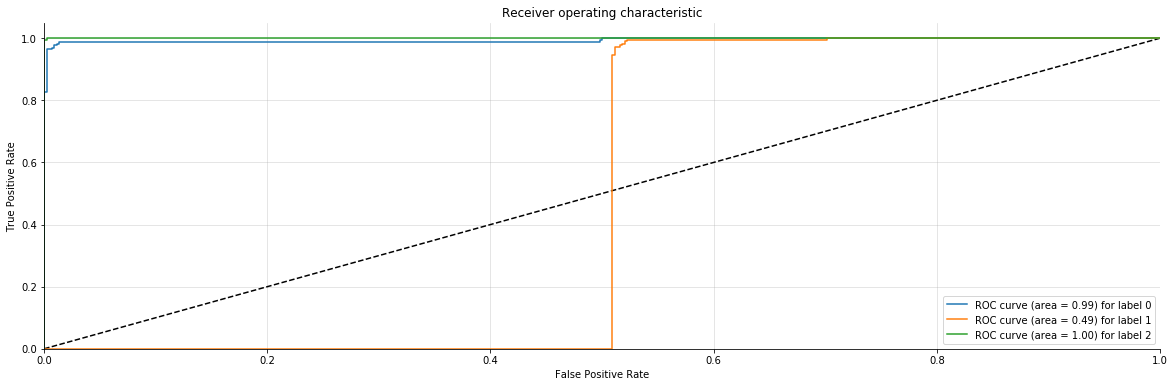

In [59]:
plot_multiclass_roc(y_score_svm,X_test_pca, y_test, 3)

<a id = 'kNN_for_cooler_failure_classification.'></a>

### kNN for cooler failure classification

In [60]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

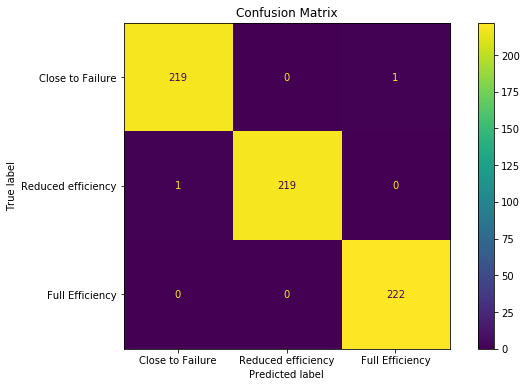

In [61]:
cmatrix(knn)

In [62]:
y_score_knn = knn.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knn

array([[0.        , 0.14285714, 0.85714286],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

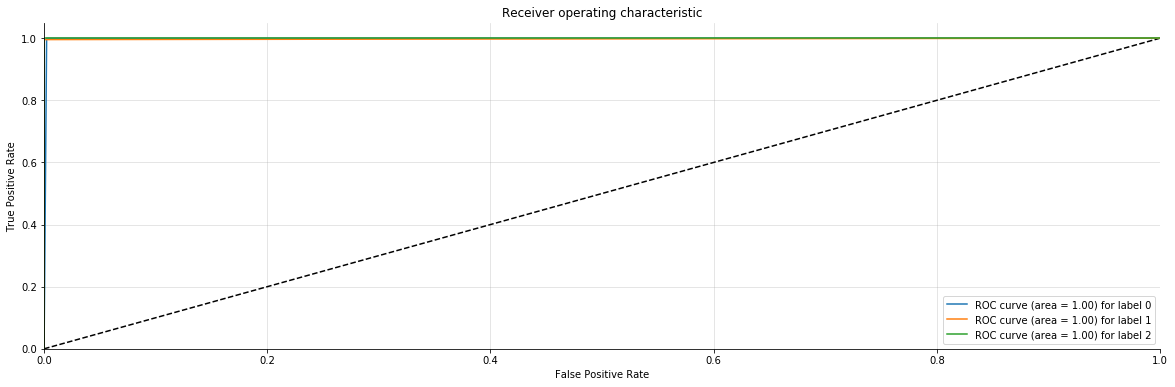

In [63]:
plot_multiclass_roc(y_score_knn, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [64]:
print(metrics.classification_report(y_test, knn.predict(X_test_pca)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



<a id = 'RF_for_cooler_failure_classification.'></a>

### RF for cooler failure classification

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set

classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [74]:
def cmatrixrf(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_scaled,y_test, display_labels= ['Close to Failure','Reduced efficiency','Full Efficiency'],  ax = ax)
    return disp.confusion_matrix
    

array([[219,   0,   1],
       [  0, 220,   0],
       [  0,   0, 222]], dtype=int64)

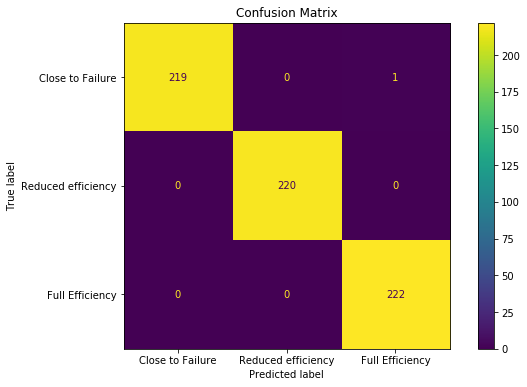

In [75]:
cmatrixrf(classifier_rf)

In [68]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

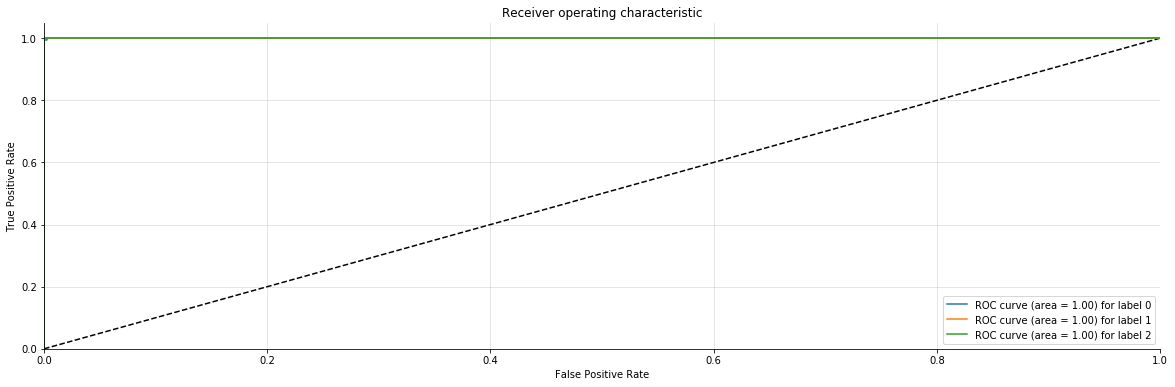

In [69]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

#### Hypertune parameters

In [70]:
rf_hyper = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight = 'balanced')

In [71]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

## maximum depth is 1,2,5,10,20
## minimum sample leaf is 5,10,20,50,100
## maximum no. of features is 2,3,4
## no. of trees is 10, 30,50,100,200

In [72]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator= rf_hyper, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")

In [73]:
%%time
grid_search.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.3min finished


Wall time: 2min 15s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='f1_macro', verbose=1)

In [76]:
rf_best = grid_search.best_estimator_ ## best estimator is assigned to rf_best
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=3,
                       min_samples_leaf=5, n_estimators=50, n_jobs=-1,
                       random_state=42)

array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

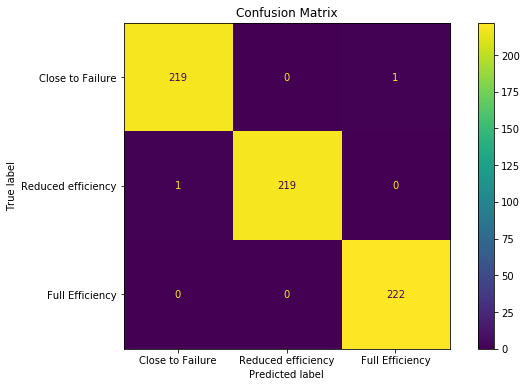

In [77]:
cmatrixrf(rf_best)

In [78]:
y_score_rf_hyper = rf_best.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf_hyper

array([[0.11701608, 0.22278889, 0.66019503],
       [0.36289392, 0.50003596, 0.13707012],
       [0.61508384, 0.36048817, 0.02442799],
       ...,
       [0.62191295, 0.36964063, 0.00844642],
       [0.62191295, 0.36964063, 0.00844642],
       [0.37490193, 0.49369458, 0.13140349]])

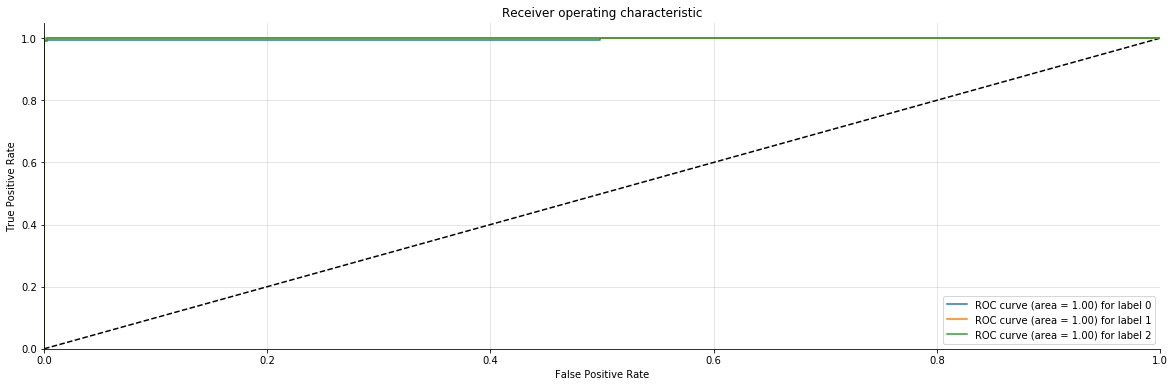

In [79]:
plot_multiclass_roc(y_score_rf_hyper, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



### Feature extraction using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[10,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

### SVM + PCA

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [92]:
def cmatrixpca(model):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_pca,y_test,display_labels= ['Close to Failure','Reduced efficiency','Full Efficiency'],   ax = ax)
    return disp.confusion_matrix
    

In [ ]:
cmatrixpca(svm_model_linear)

In [ ]:
y_score_svm_pca = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svm_pca

In [85]:
def plot_multiclass_roc_pca(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [ ]:
plot_multiclass_roc_pca(y_score_svm_pca, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [ ]:
print(classification_report(y_test, svm_model_linear.predict(X_test_pca)))

### kNN + PCA

In [90]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[219,   0,   1],
       [  1, 219,   0],
       [  0,   0, 222]], dtype=int64)

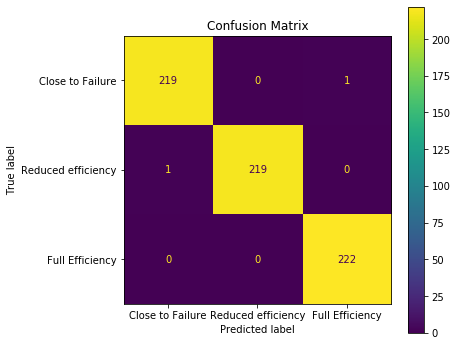

In [93]:
cmatrixpca(knn_pca)

In [94]:
y_score_knnpca = knn_pca.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knnpca

array([[0.        , 0.14285714, 0.85714286],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

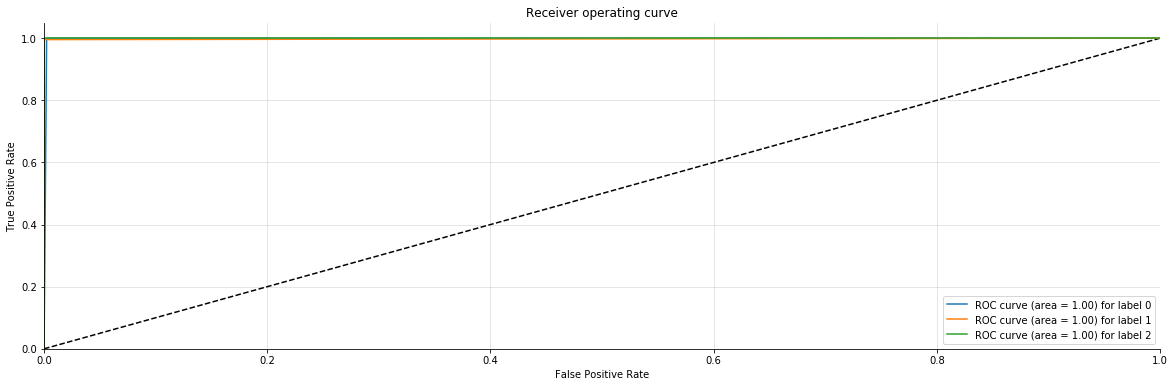

In [95]:
plot_multiclass_roc_pca(y_score_knnpca, X_test_pca, y_test, n_classes=3, figsize=(20, 6))

In [96]:
print(classification_report(y_test, knn_pca.predict(X_test_pca)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



### Noise 

In [87]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)
noise.shape

X_testnoise = X_test_scaled + noise

In [82]:

print(classification_report(y_test, rf_best.predict(X_testnoise)))

              precision    recall  f1-score   support

           3       0.95      0.99      0.97       220
          20       1.00      0.95      0.97       220
         100       0.99      1.00      1.00       222

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



In [83]:
y_score_RFNOISE = rf_best.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_RFNOISE

array([[0.1470433 , 0.25208281, 0.60087389],
       [0.3116322 , 0.45147481, 0.23689298],
       [0.61213326, 0.36014251, 0.02772423],
       ...,
       [0.5862652 , 0.36041949, 0.05331531],
       [0.59309431, 0.36957195, 0.03733374],
       [0.38826823, 0.44462674, 0.16710503]])

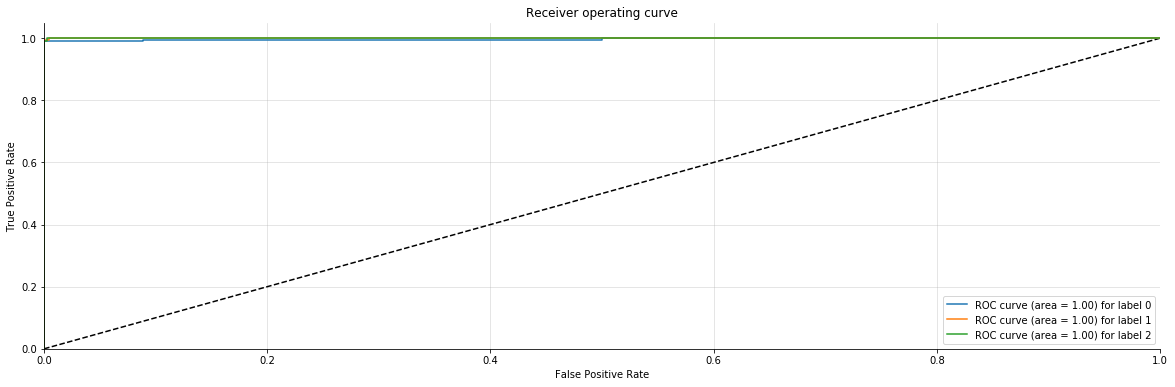

In [86]:
plot_multiclass_roc_pca(y_score_RFNOISE, X_testnoise, y_test, n_classes=3, figsize=(20, 6))

### Noise + kNN

In [88]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)
noise.shape

X_testpcanoise = X_test_pca + noise

In [97]:
y_score_knnnoise = knn_pca.fit(X_train_pca, y_train).predict_proba(X_testpcanoise)
y_score_knnnoise

array([[0.        , 0.14285714, 0.85714286],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

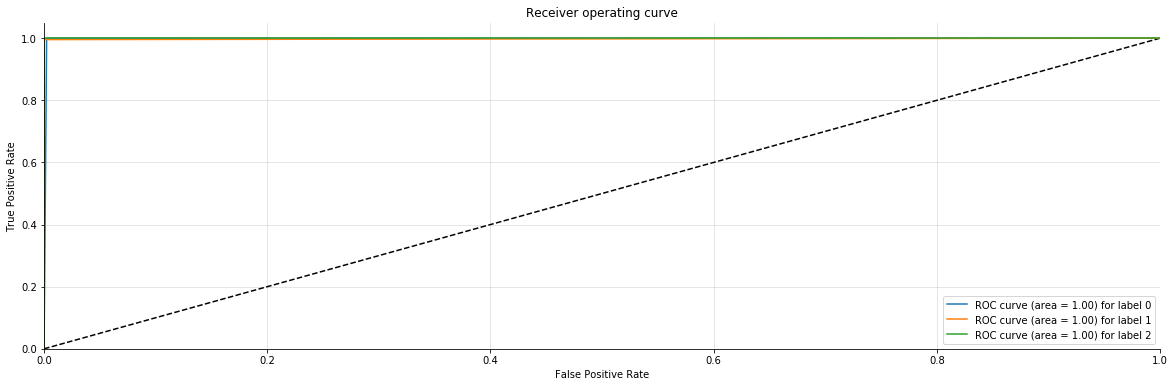

In [98]:
plot_multiclass_roc_pca(y_score_knnnoise, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))

In [99]:

print(classification_report(y_test, knn_pca.predict(X_testpcanoise)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662



### Noise + SVM

In [100]:
y_score_svm_pcaNOISE = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_testpcanoise)
y_score_svm_pcaNOISE

array([[-0.30053008,  1.28539036,  2.25413589],
       [ 0.79792342,  2.24994004, -0.19769811],
       [ 2.25103153,  1.18197558, -0.26987055],
       ...,
       [ 2.23333162,  1.19831637, -0.26391929],
       [ 2.26532279,  1.15740664, -0.27582171],
       [ 0.78415911,  2.25443583, -0.19373651]])

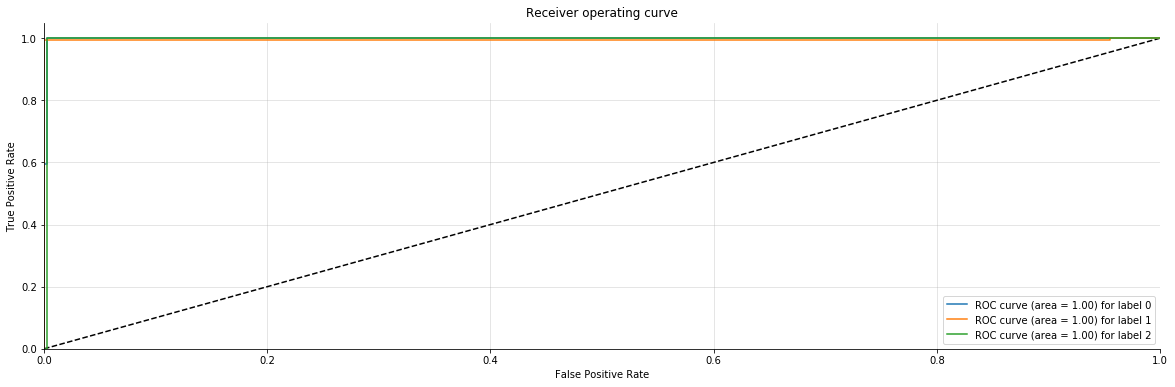

In [101]:
plot_multiclass_roc_pca(y_score_svm_pcaNOISE, X_testpcanoise, y_test, n_classes=3, figsize=(20, 6))

In [102]:
print(classification_report(y_test, svm_model_linear.predict(X_testpcanoise)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       220
          20       1.00      1.00      1.00       220
         100       1.00      1.00      1.00       222

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662

